# Bayesian Methods

Good references for Bayesian analysis are
- Gelman et al. (2013)
- Kruschke (2014)

## The Bayesian Framework

- "Rely on data only" -> **"frequentist"**
  - Dataset -> Optimal parameters
- "Datasets as **snapshots of reality**" -> "Bayesians"
  - Parameters are "random"
  - Try to determine the **whole distribution** of the parameter
- **Conditional Probability**
  - Two random sets: $A$ and $B$
  - The probability of $A$ knowing $B$ is $$P[A|B]=\frac{P[A \cap B]}{P[B]}$$
- Likewise, the probability that both events occur is $P[A \cap B] = P[A]P[B|A]$. 
- Given $n$ disjoint events $A_i, i=1,\dots,n$ such that $\sum_{i=1}^nP(A_i)=1$, then for any event $B$, the **law of total probabilities** is $$P(B)=\sum_{i=1}^nP(B \cap A_i)= \sum_{i=1}^nP(B|A_i)P(A_i)$$
- A **general version of Bayes' theorem** $$P(A_i|B)=\frac{P(A_i)P(B|A_i)}{P(B)}= \frac{P(A_i)P(B|A_i)}{\sum_{i=1}^nP(B|A_i)P(A_i)}$$
- The **core topic**: the estimation of some parameter $\boldsymbol{\theta}$ (possibly a vector) given a dataset, which we denote with $\boldsymbol{y}$.
- In Bayesian analysis, a fact is that the data is not *almighty*. The distribution of the parameter $\boldsymbol{\theta}$ will be a *mix* between some **prior** distribution set by the statistician and the empirical distribution from the data: $$p(\boldsymbol{\theta}| \boldsymbol{y})=\frac{p(\boldsymbol{\theta})p(\boldsymbol{y} |\boldsymbol{\theta})}{p(\boldsymbol{y})} \propto p(\boldsymbol{\theta})p(\boldsymbol{y} |\boldsymbol{\theta})$$
The interpretation: the distribution of $\boldsymbol{\theta}$ knowing the data $\boldsymbol{y}$ is proportional to the distribution of $\boldsymbol{\theta}$ times the distribution of $\boldsymbol{y}$ knowing $\boldsymbol{\theta}$, and $p(\boldsymbol{y})$ is often omitted because it's simply a scaling number (constant).
- The purpose for a Bayesian analysis is to compute the so-called **posterior** distribution $p(\boldsymbol{\theta}|\boldsymbol{y})$ via the **prior** distribution $p(\boldsymbol{\theta})$ and the **likelihood function** $p(\boldsymbol{y}|\boldsymbol{\theta})$. The simplest way to define a non-informative prior is to set a uniform distribution over some realistic interval(s).
- The most challenging part is usually the likelihood function. The easiest way to solve the problem is to resort to a specific distribution and then consider the observations to be i.i.d. Assuming the parameters of the distributions $\boldsymbol{\lambda}$, then the likelihood can be written as $$p(\boldsymbol{y} |\boldsymbol{\theta}, \boldsymbol{\lambda})=\prod_{i=1}^I f_{\boldsymbol{\lambda}}(y_i; \boldsymbol{\beta})$$
**Hierarchical Models**: Here the problem is more complex because adding $\boldsymbol{\lambda}$ changes the posterior distribution to $p(\boldsymbol{\theta}, \boldsymbol{\lambda}|\boldsymbol{y})$ - a joint distribution of $\boldsymbol{\theta}$ and $\boldsymbol{\lambda}$ given $\boldsymbol{y}$ must be found.
- **Application of Bayesian methods**: widely used in **portfolio choice**. The distribution of asset returns depends on some parameter and the main issue is to determine the posterior distribution. Some literature:
  - Asset allocation: Lai et al. (2011, stochastic optimization), Guidolin and Liu (2016), Dangl and Weissensteiner (2020)
  - Shrinkage techniques (of means and covariances matrices): Frost and Savarino (1986), Kan and Zhou (2007) and DeMiguel et al. (2015)
  - Asset pricing theories: Tu and Zhou (2010)
  - Bayesian optimal frontier: Bauder et al. (2020)

## Bayesian Sampling

### Gibbs Sampling

**Simulation**: suppose we want to simulate the multivariate distribution of a random vector $\boldsymbol{X}$ given by its density $p=p(x_1,\dots,x_J)$. The full distribution can be complex, but we only need a more accessible *marginal* one which *depends on only one variable*: $$p(X_j=x_j|X_1= x_1,\dots,X_{j-1}=x_{j-1},X_{j+1}=x_{j+1},\dots,X_J=x_J)=p(X_j=x_j|\boldsymbol{X}_{-j}=\boldsymbol{x}_{-j})$$
where the compact notation $\boldsymbol{X}_{-j}$ denotes all variables except $X_j$. One way to generate samples is **Markov Chain Monte Carlo (MCMC)**, and is iterative, with $p(x_j|\boldsymbol{x}_{-j})$ known.

We write $x_j^m$ for the $m^{th}$ sample of the $j^{th}$ variable $X_j$. The simulation starts with a prior (or fixed, or random) sample $\boldsymbol{x}^0=(x_1^0,\dots,x_J^0)$. Then, for a sufficient large number of times $T$, new samples are drawn according to
\begin{align*}
x_1^{m+1} &= p(X_1|X_2=x_2^{m}, \dots ,X_J=x_J^m) ;\\
x_2^{m+1} &=p(X_2|X_1=x_1^{m+1}, X_3=x^{m}_3, \dots, X_J=x_J^m); \\
\dots& \\
x_J^{m+1}&= p(X_J|X_1=x_1^{m+1}, X_2=x_2^{m+1}, \dots, X_{J-1}=x_{J-1}^{m+1}).
\end{align*}
After each line, the value of the variable is *updated*. For line $j$, all variables $X_1, X_2, \dots, X_{j-1}$ are updated to their $(m+1)^{th}$ state. The above algorithm is called **Gibbs sampling**, which relates to Markov chains because each new iteration depends only on the previous one.

Under some technical assumptions, as $T$ increases, the distribution of $\boldsymbol{x}_T$ converges to that of $p$. These have been widely discussed in literature as Tierney (1994), Roberts and Smith (1994), as well as at section 11.7 of Gelman et al. (2013).

Sometimes, *the full distribution is complex*, and *the conditional laws are also hard to determine and to sample*. A more general method called *Metropolis-Hastings* can be used.

### Metropolis-Hastings Sampling

The Gibbs algorithm can be considered as a particular case of the Metropolis-Hastings (MH) method (Metropolis and Ulam, 1949). It also aims to simulate ranomd variables that follow $p(\boldsymbol{x})$ with the ability to sample from a simpler form $p(\boldsymbol{x}|\boldsymbol{y})$.

Once an initial value for $\boldsymbol{x}$ has been sampled as $\boldsymbol{x}_0$, each new iteration $m$ takes place in 3 stages:
1. Generate a candidate value $\boldsymbol{x}_{m+1}^{'}$ from $p(\boldsymbol{x}|\boldsymbol{x}_m)$.
2. Compute the acceptance ratio $\alpha=\min\left(\frac{p(\boldsymbol{x}'_{m+1})p(\boldsymbol{x}_{m}|\boldsymbol{x}'_{m+1})}{p(\boldsymbol{x}_{m})p(\boldsymbol{x}'_{m+1}|\boldsymbol{x}_{m})} \right)$.
3. Pick $\boldsymbol{x}_{m+1}=\boldsymbol{x}_{m+1}^{'}$ with probability $\alpha$ or stick with the previous value $(\boldsymbol{x}_{m+1}=\boldsymbol{x}_m)$ with probability $1-\alpha$.

The interpretation of the acceptance ratio is not straightforward. 
When the sampling generator is symmetric $(p(\boldsymbol{x}|\boldsymbol{y})=p(\boldsymbol{y}|\boldsymbol{x}))$: 
- The candidate is always chosen whenever $p(\boldsymbol{x}_{m+1}^{'})\geq p(\boldsymbol{x}_{m})$.
- If the reverse holds $(p(\boldsymbol{x}_{m+1}^{'})< p(\boldsymbol{x}_{m}))$, then the candidate is retained with odds $p(\boldsymbol{x}_{m+1}^{'})/p(\boldsymbol{x}_{m})$.
- The more likely the new proposal, the higher odds of retaining it.

Often the first (few) simulations are discarded to leave time to the chain to converge to a high probablity region (called '*burn in*'), and ensured that the first retained samples are representative.

Some additional details are outlined in Section 11.2 of Gelman et al. (2013) and in Chapter 7 of Kruschke (2014).

## Bayesian Linear Regression

Because Bayesian concepts are rather abstract, it is useful to illustrate the theoretical notions with a simple example. In a linear model, 
- $y_i=\boldsymbol{x}_i \boldsymbol{b}+\varepsilon_i$
- $\varepsilon_i$ i.i.d. assumed
- $\varepsilon_i$ normally distributed with zero mean and variance $\sigma^2$
The likelihood $p(\boldsymbol{y}|\boldsymbol{\theta}, \boldsymbol{\lambda})$ translates into $$p(\boldsymbol{\varepsilon}|\boldsymbol{b}, \sigma)=\prod_{i=1}^I\frac{e^{-\frac{\varepsilon_i^2}{2\sigma}}}{\sigma\sqrt{2\pi}}=(\sigma\sqrt{2\pi})^{-I}e^{-\sum_{i=1}^I\frac{\varepsilon_i^2}{2\sigma^2}}$$
In a regression analysis, the data is given both by $\boldsymbol{y}$ and by $\boldsymbol{X}$, hence both are reported in the notations. Simply acknowledging that $\boldsymbol{\varepsilon}=\boldsymbol{y}-\boldsymbol{X}\boldsymbol{b}$, we get 
\begin{align*}
p(\textbf{y},\textbf{X}|\textbf{b}, \sigma)&=\prod_{i=1}^I\frac{e^{-\frac{\varepsilon_i^2}{2\sigma}}}{\sigma\sqrt{2\pi}}\\
&=(\sigma\sqrt{2\pi})^{-I}e^{-\sum_{i=1}^I\frac{\left(y_i-\textbf{x}_i'\textbf{b}\right)^2}{2\sigma^2}}=(\sigma\sqrt{2\pi})^{-I} e^{-\frac{\left(\textbf{y}-\textbf{X}\textbf{b}\right)' \left(\textbf{y}-\textbf{X}\textbf{b}\right)}{2\sigma^2}}\\
&=\underbrace{(\sigma\sqrt{2\pi})^{-I} e^{-\frac{\left(\textbf{y}-\textbf{X}\hat{\textbf{b}}\right)' \left(\textbf{y}-\textbf{X}\hat{\textbf{b}}\right)}{2\sigma^2}}}_{\text{depends on } \sigma, \text{ not } \textbf{b}}\times \underbrace{e^{-\frac{(\textbf{b}-\hat{\textbf{b}})'\textbf{X}'\textbf{X}(\textbf{b}-\hat{\textbf{b}})}{2\sigma^2}}}_{\text{ depends on both } \sigma, \text{ and } \textbf{b} }.
\end{align*}
In the last line, the second term is a function of the difference $\textbf{b}-\hat{\textbf{b}}$, where $\hat{\textbf{b}}=(\textbf{X}^{'}\textbf{X})^{-1}\textbf{X}^{'}\textbf{y}$, since $\hat{\textbf{b}}$ is a natural benchmark for the mean of $\textbf{b}$.

The above expression is the frequentist block of the posterior: the likelihood. If we want to obtain a tractable expression for the posterior, we need to find a prior component that has a form that will combine well with this likelihood - **conjugate priors**. A natural candidate for the right part is the *multivariate Gaussian density*: $$p[\boldsymbol{b}|\sigma]=\sigma^{-k}e^{-\frac{(\boldsymbol{b}-\boldsymbol{b}_0)'\boldsymbol{\Lambda}_0(\boldsymbol{b}-\boldsymbol{b}_0)}{2\sigma^2}}$$
where we are obliged to condition with respect to $\sigma$. The density has prior mean $\boldsymbol{b}_0$ and prior covariance matrix $\boldsymbol{\Lambda}_0^{-1}$. This prior gets us one step closer to the posterior because
\begin{align*}
p[\boldsymbol{b},\sigma|\boldsymbol{y},\boldsymbol{X}]& \propto p[\boldsymbol{y},\boldsymbol{X}|\boldsymbol{b},\sigma]p[\boldsymbol{b},\sigma] \\
&\propto p[\boldsymbol{y},\boldsymbol{X}|\boldsymbol{b},\sigma]p[\boldsymbol{b}|\sigma]p[\sigma].
\end{align*}
In order to fully specify the cascade of probabilities, we need to take care of $\sigma$ and set a density of the form $$p[\sigma^2]\propto (\sigma^2)^{-1-a_0}e^{-\frac{b_0}{2\sigma^2}}$$
which is close to that of the left part of the regression expression. This corresponds to an inverse *gamma distribution* for the variance with prior parameters $a_0$ and $b_0$.

Now, we can simplify $p[\boldsymbol{b}, \sigma|\boldsymbol{y},\boldsymbol{X}]$ with previous expressions:
\begin{align*}
p[\boldsymbol{b},\sigma|\boldsymbol{y},\boldsymbol{X}]& \propto
(\sigma\sqrt{2\pi})^{-I} \sigma^{-2(1+a_0)} e^{-\frac{\left(\boldsymbol{y}-\boldsymbol{X}\hat{\boldsymbol{b}}\right)' \left(\boldsymbol{y}-\boldsymbol{X}\hat{\boldsymbol{b}}\right)}{2\sigma^2}} \\
&\quad \times e^{-\frac{(\boldsymbol{b}-\hat{\boldsymbol{b}})'\boldsymbol{X}'\boldsymbol{X}(\boldsymbol{b}-\hat{\boldsymbol{b}})}{2\sigma^2}}\sigma^{-k}e^{-\frac{(\boldsymbol{b}-\boldsymbol{b}_0)'\boldsymbol{\Lambda}_0(\boldsymbol{b}-\boldsymbol{b}_0)}{2\sigma^2}}e^{-\frac{b_0}{2\sigma^2}} \\
\end{align*}
which can be rewritten as
\begin{align*}
p[\boldsymbol{b},\sigma|\boldsymbol{y},\boldsymbol{X}]& \propto  \sigma^{-I-k-2(1+a_0)} \\
&\times  \exp\left(-\frac{\left(\boldsymbol{y}-\boldsymbol{X}\hat{\boldsymbol{b}}\right)' \left(\boldsymbol{y}-\boldsymbol{X}\hat{\boldsymbol{b}}\right) + (\boldsymbol{b}-\hat{\boldsymbol{b}})'\boldsymbol{X}'\boldsymbol{X}(\boldsymbol{b}-\hat{\boldsymbol{b}}) + (\boldsymbol{b}-\boldsymbol{b}_0)'\boldsymbol{\Lambda}_0(\boldsymbol{b}-\boldsymbol{b}_0)+b_0}{2\sigma^2} \right) .
\end{align*}
The above expression is simply *a quadratic form* in $\boldsymbol{b}$ and can be rewritten in a much more compact manner:
$$p(\boldsymbol{b}|\boldsymbol{y},\boldsymbol{X},\sigma) \propto \left[\sigma^{-k}e^{-\frac{(\boldsymbol{b}-\boldsymbol{b}_*)'\boldsymbol{\Lambda}_*(\boldsymbol{b}-\boldsymbol{b}_*)}{2\sigma^2}}\right] \times \left[ (\sigma^2)^{-1-a_*}e^{-\frac{b_*}{2\sigma^2}}  \right]$$
where
\begin{align*}
\boldsymbol{\Lambda}_* &= \boldsymbol{X}'\boldsymbol{X}+\boldsymbol{\Lambda}_0  \\
\boldsymbol{b}_*&=  \boldsymbol{\Lambda}_*^{-1}(\boldsymbol{\Lambda}_0\boldsymbol{b}_0+\boldsymbol{X}'\boldsymbol{X}\hat{\boldsymbol{b}}) \\
a_* & = a_0 + I/2  \\
b_* &=b_0+\frac{1}{2}\left(\boldsymbol{y}'\boldsymbol{y}+ \boldsymbol{b}_0'\boldsymbol{\Lambda}_0\boldsymbol{b}_0+\boldsymbol{b}_*'\boldsymbol{\Lambda}_*\boldsymbol{b}_* \right)\\
\end{align*}
The exponents has two parts:
1. The Gaussian component which relates mostly to $\boldsymbol{b}$
2. The inverse gamma component entirely dedicated to $\sigma$.

The mix between the prior and the data:
- The posterior covariance matrix of the Gaussian part ($\boldsymbol{\Lambda}_*$) is the *sum* between the prior and a quadratic form from the data.
- The posterior mean $\boldsymbol{b}_*$ is a *weighted average* between the prior $\boldsymbol{b}_0$ and the sample estimator $\hat{\boldsymbol{b}}$.
- Such blends are often called **shrinkages** ($\boldsymbol{X}^{'}\boldsymbol{X}$ shrunk towards the prior $\boldsymbol{\Lambda}_0$).
- A **regularization procedure**: pure fit from data + 'external' ingredient for final estimation.
- Interested readers may refer to Section 16.3 of Greene (2018).

To simplify the code and curtail computation times, we consider 2 predictors: market capitalization (size anomaly) and price-to-book ratio. In statistics, the **precision matrix** is the inverse of the covariance matrix. In the parameters, the first two priors relate to the Gaussian law and the last two to the inverse gamma distribution:
$$f_\text{invgamma}(x, \alpha, \beta)=\frac{\beta^\alpha}{\Gamma(\alpha)}x^{-1-\alpha}e^{-\frac{\beta}{x}}$$
where $\alpha$ is the shape and $\beta$ is the scale.

**In Python**, `pyMC3` and `bambi` packages provide us with some advanced solutions for the Bayesian analysis and regressions. However, to replicate the case in the textbook, I recommend a simple package `conjugate_bayes` with its homepage [here](https://github.com/tonyduan/conjugate-bayes). This package, however, is with poor maintenance and *a simple `pip install` command* would not even be able to pull down the source code. To achieve this and run this notebook, you may visit the source code [here](https://github.com/tonyduan/conjugate-bayes/blob/master/conjugate_bayes/models.py) and manually pull it into your local Python package library. For your convenience, I have copied the source code for the implementation into this notebook. See the following for details.

In [1]:
# import bambi as bmb
# import pymc3 as pm
import numpy as np
import pandas as pd

data_ml = pd.read_pickle('./data/data_ml.pkl')
X = data_ml[data_ml.columns[2:95]]
y = data_ml['R1M_Usd']

separation_date = pd.to_datetime('2014-01-15')
training_sample = data_ml[data_ml['date'] < separation_date]
test_sample = data_ml[data_ml['date'] > separation_date]

In [2]:
import scipy as sp
class NIGLinearRegression(object):
    """
    The normal inverse-gamma prior for a linear regression model with unknown
    variance and unknown relationship. Specifically,
        1/σ² ~ Γ(a, b)
        β ~ N(0, σ²V)

    Parameters
    ----------
    mu: prior for N(mu, v) on the model β
    v:  prior for N(mu, v) on the model β
    a:  prior for Γ(a, b) on the inverse sigma2 of the distribution
    b:  prior for Γ(a, b) on the inverse sigma2 of the distribution
    """
    def __init__(self, mu, v, a, b):
        self.__dict__.update({"mu": mu, "v": v, "a": a, "b": b})

    def fit(self, x_tr, y_tr):
        m, _ = x_tr.shape
        mu_ast = np.linalg.inv(np.linalg.inv(self.v) + x_tr.T @ x_tr) @ \
                 (np.linalg.inv(self.v) @ self.mu + x_tr.T @ y_tr)
        v_ast = np.linalg.inv(np.linalg.inv(self.v) + x_tr.T @ x_tr)
        a_ast = self.a + 0.5 * m
        b_ast = self.b + 0.5 * (y_tr - x_tr @ self.mu).T @ \
                np.linalg.inv(np.eye(m) + x_tr @ self.v @ x_tr.T) @ \
                (y_tr - x_tr @ self.mu.T)
        self.__dict__.update({"mu": mu_ast, "v": v_ast, "a": a_ast, "b": b_ast})

    def predict(self, x_te):
        scales = np.array([x.T @ self.v @ x for x in x_te]) + 1
        scales = (self.b / self.a * scales) ** 0.5
        return sp.stats.t(df=2 * self.a, loc=x_te @ self.mu, scale=scales)

    def get_conditional_beta(self, sigma2):
        return sp.stats.multivariate_normal(mean=self.mu, cov=sigma2 * self.v)

    def get_marginal_sigma2(self):
        return sp.stats.invgamma(self.a, scale=self.b)

In [3]:
# You may download the source code for this module at https://github.com/tonyduan/conjugate-bayes/blob/master/conjugate_bayes/models.py

# from conjugate_bayes.models import NIGLinearRegression

n_samples = 10000 # n_samples are set at 10k to balance between accuracy and speed
X_tr = np.array(test_sample[['Mkt_Cap_3M_Usd', 'Pb']])[:n_samples]
X_tr = np.hstack((X_tr, np.ones((n_samples, 1)))) # add a constant
y_tr = np.array(test_sample['R1M_Usd'])[:n_samples]
# The following settings are copied from the original R code
prior_mean = np.array([0.1, 0.1, 0.01])
cov_matrix = np.diag(np.power(prior_mean, 2))
# fit the model
model = NIGLinearRegression(mu=prior_mean, v=cov_matrix, a=0.5, b=0.5)
model.fit(X_tr, y_tr)

In [4]:
# Get the marginal sigma and conditional beta
sigma2 = model.get_marginal_sigma2()
beta = model.get_conditional_beta(sigma2=sigma2.mean())

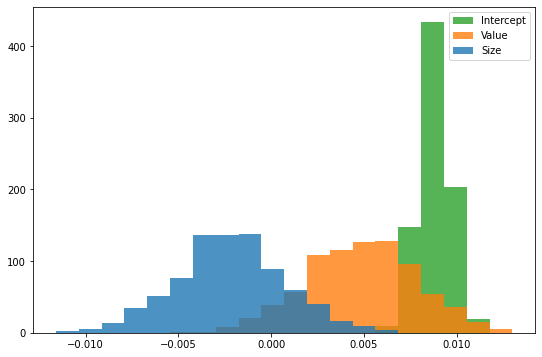

In [5]:
import matplotlib.pyplot as plt

r = beta.rvs(size=1000) # get 10000 samples from the distribution for beta
plt.figure(figsize=(9, 6))
plt.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.8, label=['Size', 'Value', 'Intercept'])
plt.legend()
plt.show()

You may see that the result is similar to that (Figure 9.1) in the textbook. 

- The distribution of the constant in Figure 9.1 is firmly to the right with a small dispersion,hence it is solidly positive. 
- For the size coefficient, it is the opposite; it is negative (small
firms are more profitable). 
- With regard to value, it is hard to conclude, the distribution is balanced around zero: there is no clear exposition to the price-to-book ratio variable.

## Naive Bayes Classifier

Bayes’ theorem can also be easily applied to **classification**. We have
$$P[\boldsymbol{y} | \boldsymbol{X}] = \frac{P[ \boldsymbol{X} | \boldsymbol{y}]P[\boldsymbol{y}]}{P[\boldsymbol{X}]} \propto P[ \boldsymbol{X} | \boldsymbol{y}]P[\boldsymbol{y}]$$
and then split the input matrix into its column vectors $\boldsymbol{X}=(\boldsymbol{x}_1, \dots, \boldsymbol{x}_K)$. This yields
$$P[\boldsymbol{y}|\boldsymbol{x}_1, \dots, \boldsymbol{x}_K]\propto P[\boldsymbol{x}_1, \dots, \boldsymbol{x}_K|\boldsymbol{y}]P[\boldsymbol{y}]$$
The ‘naive’ qualification of the method comes from a simplifying assumption on the features - if they are all *mutually independent*, the likelihood in the above expression can be expanded into
$$P[\boldsymbol{y} | \boldsymbol{x}_1,\dots,\boldsymbol{x}_K] \propto P[\boldsymbol{y}]\prod_{k=1}^K P[\boldsymbol{x}_k| \boldsymbol{y}]$$
The likelihood can be done non-parametrically (via kernel estimation) or with common distributions (Gaussian for continuous data, Bernoulli for binary data). For factor investing with continuous features, the Gaussian law is more adequate:
$$P[x_{i,k}=z|\boldsymbol{y}_i= c]=\frac{e^{-\frac{(z-m_c)^2}{2\sigma_c^2}}}{\sigma_c\sqrt{2\pi}}$$
where $c$ is the value of the classes taken by $y$ and $\sigma_c$ and $m_c$ are the standard error and mean of $x_{i,k}$ conditional on $y_i=c$.

In practice, each class is spanned and $\sigma_c$ and $m_c$ are taken to be the sample statistics. This Gaussian parametrization is probably *ill-suited* to our dataset because the features are uniformly distributed. Technically, we can make a **double-transformation**. Given a vector of features $\boldsymbol{x}_k$ with empirical cdf $F_{\boldsymbol{x}_k}$, the variable
$$\tilde{\boldsymbol{x}}_k=\Phi^{-1}\left(F_{\boldsymbol{x}_k}(\boldsymbol{x}_k) \right)$$
will have a standard normal law whenever $F_{\boldsymbol{x}_k}$ is not pathological (continuous and strictly increasing and observations lie in the open interval $(0,1)$). Otherwise, you may refer to the literature on the NORmal-To-Anything (NORTA) method (see, e.g., Chen (2001) and Coqueret (2017)).

Lastly, the prior $P[y]$ in is often either taken to be uniform across the classes ($1/K$ for all $k$) or equal to the sample distribution.

For Python implementation, we will directly apply the `BernoulliNB` classifier in `sklearn.naive_bayes` package to complete the classification as well as perform a transformation as the original notebook.

In [6]:
from sklearn.naive_bayes import BernoulliNB
features_short = ["Div_Yld", "Eps", "Mkt_Cap_12M_Usd", "Mom_11M_Usd", "Ocf", "Pb", "Vol1Y_Usd"]
fit_NB_ber = BernoulliNB()
fit_NB_ber.fit(training_sample[features_short], training_sample['R1M_Usd_C'])

BernoulliNB()

In [8]:
# Hit Ratio
np.mean(fit_NB_ber.predict(test_sample[features_short]) == test_sample['R1M_Usd_C'])

0.5037175250683683

In [9]:
# Transformation to gaussian distribution
from sklearn.naive_bayes import GaussianNB
gauss_features_train = sp.stats.norm.ppf(training_sample[features_short] * 0.999 + 0.0001)
gauss_features_test = sp.stats.norm.ppf(test_sample[features_short] * 0.999 + 0.0001)
fit_NB_gauss = GaussianNB()
fit_NB_gauss.fit(gauss_features_train, training_sample['R1M_Usd_C'])

GaussianNB()

In [11]:
np.mean(fit_NB_gauss.predict(gauss_features_test) == test_sample['R1M_Usd_C'])

0.4956984958979034

It seems that the Bernoulli Naive Bayes classifier does better in terms of the hit ratio. Let's make some plots as the R code.

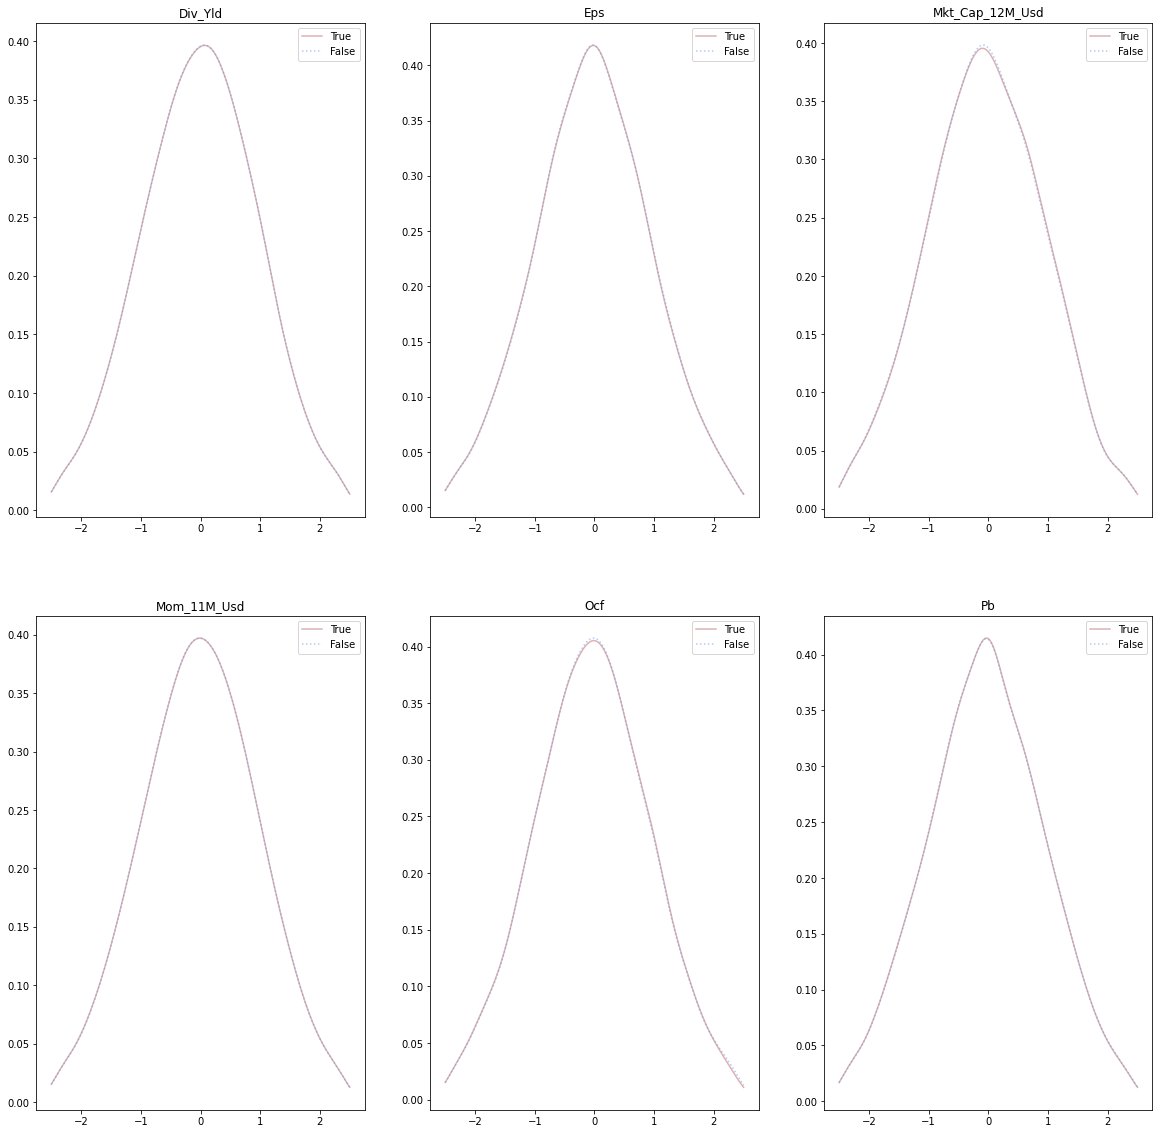

In [17]:
from scipy.stats import gaussian_kde

# pos/neg index
pos = training_sample[training_sample['R1M_Usd_C'] == 1].reset_index(drop=True).index.tolist()
neg = training_sample[training_sample['R1M_Usd_C'] == 0].reset_index(drop=True).index.tolist()

# select data
plt.subplots(figsize=(20, 20))
for idx in range(len(features_short) - 1):
    pos_density = gaussian_kde(gauss_features_train[:, idx][pos, ])
    neg_density = gaussian_kde(gauss_features_train[:, idx][neg, ])
    # modify shape
    pos_density.covariance_factor = lambda: 0.2
    pos_density._compute_covariance()
    neg_density.covariance_factor = lambda: 0.2
    neg_density._compute_covariance()

    # construct x_axis
    xs = np.linspace(-2.5,2.5,500)

    plt.subplot(2, 3, idx + 1)
    plt.plot(xs, pos_density(xs),
             color="darkred", linestyle=None, alpha=0.3, label="True")
    plt.plot(xs, neg_density(xs),
             color="cornflowerblue", linestyle=':', alpha=0.5, label="False")
    plt.legend(loc="best")
    plt.title(features_short[idx])
plt.show()

## Bayesian Additive Trees

### General Formulation

Bayesian additive regression trees (BARTs) are an **ensemble** technique that mixes Bayesian thinking and regression trees. In BARTs like in Bayesian regressions, the regularization comes from the prior.

Formally, the model is an aggregation of $M$ models, which we write as
$$y=\sum_{m=1}^M \mathcal{T}_m(q_m, \boldsymbol{w}_m, \boldsymbol{x})+\varepsilon$$
where $\varepsilon$ is a Gaussian noise with variance $\sigma^2$ and the $\mathcal{T}_m=\mathcal{T}_m(q_m, \boldsymbol{w}_m, \boldsymbol{x})$ are decision trees with structure $q_m$ (splits) and weight vectors $\boldsymbol{w}_m$ (w.r.t. leaf values) (see Chapter 6 and Figure 6.5 for boosted trees).

At the macro-level, BARTs can be viewed as traditional Bayesian objects where the parameters $\boldsymbol{\theta}$ are all of the unknowns coded through $q_m, \boldsymbol{w}_m$ and $\sigma^2$ and the focus is set on *determining posterior* $$\left(q_m,\textbf{w}_m,\sigma^2\right) | (\textbf{X}, \textbf{Y})$$
Given particular forms of priors for $\left(q_m,\textbf{w}_m,\sigma^2\right)$, the algorihm draws the parameters using a combination of Metropolis-Hastings and Gibbs samplers.

### Priors

- **Independence**
  - Between $\sigma^2$ and other parameters
  - Between trees
  - Between couples $(q_m, \boldsymbol{w}_m)$ and $(q_n, \boldsymbol{w}_n)$ for $m\neq n$
  This entails $$P(\left(q_1,\textbf{w}_1\right),\dots,\left(q_M,\textbf{w}_M\right),\sigma^2)=P(\sigma^2)\prod_{m=1}^MP\left(q_m,\textbf{w}_m\right)$$

- **Tree structure**
  Moreover, it's customary (for simplicity) to separate the structure of the tree $(q_m)$ and the terminal weights $(\boldsymbol{w}_m)$, so that by a Bayesian conditioning $$P(\left(q_1,\boldsymbol{w}_1\right),\dots,\left(q_M,\boldsymbol{w}_M\right),\sigma^2)=\underbrace{P(\sigma^2)}_{\text{noise term}}\prod_{m=1}^M\underbrace{P\left(\boldsymbol{w}_m|q_m\right)}_{\text{tree weights}}\underbrace{P(q_m)}_{\text{tree struct}}$$

Three parts for the assumptions:
- Tree's structures $q_m$ defined by their splits which are characterized by the splitting variable and the splitting level. The size of trees is parametrized such that a node at depth $d$ is nonterminal with probability given by $$\alpha(1+d)^{-\beta}, \quad \alpha \in (0, 1), \quad \beta>0$$
The authors recommend to set $\alpha=0.95$ and $\beta=2$ to force relatively shallow structures.
- The choice of splitting variables is driven by a *generalized Bernoulli distribution* which defines the odds of picking one particular feature.
  - In the original paper by Chipman et al. (2010), each predictor has the same odds of being chosen for the split.
  - The vector can also be random and sampled from a flexible Dirichlet distribution.
- $q_m \rightarrow (\boldsymbol{w}_m|q_m):$ The weights at all leaves are assumed to follow a Gaussian distribution $\mathcal{N}(\mu_\mu, \sigma_{\mu}^2)$, where $\mu_\mu=(y_{\min}+y_{\max})/2$ is the center of the range of the label values. The variance $\sigma_\mu^2$ is chosen such that $[\mu_\mu-2\sigma_\mu^2, \mu_\mu+2\sigma_\mu^2]$ covers $95\%$ of the range observed in the training set (can be altered, nonetheless).
- Lastly, for computational purposes similar to those of linear regressions, the parameter $\sigma^2$ is assumed to follow an inverse Gamma law $\text{IG}(\nu/2, \lambda \nu/2)$ akin to that used in Bayesian regressions (computed from the data).
- In sum, in addition to $M$ (number of trees), the prior depends on a small number of parameters $\alpha$ and $\beta$ (for the tree structure), $\mu_\mu$ and $\sigma_\mu^2$ (for the tree weights) and $\nu$ and $\lambda$ (for the noise term).

### Sampling and Predictions

The posterior $\left(q_m,\textbf{w}_m,\sigma^2\right) | (\textbf{X}, \textbf{Y})$ can not be obtained analytically but simulations can be efficient (to converge to the sought posterior). After some burn-in sample, a prediction for a newly observed set $\boldsymbol{x}_*$ will simply be the average (or median) of the predictions from the simulations. Assuming $S$ simulations, the average is $$\tilde{y}(\textbf{x}_*):=\frac{1}{S}\sum_{s=1}^S\sum_{m=1}^M\mathcal{T}_m\left(q_m^{(s)},\textbf{w}_m^{(s)}, \textbf{x}_*\right)$$
Each tree is sampled using the *Metropolis-Hastings* method: a tree is proposed, but it replaces the existing one only under some (possibly random) criterion. This procedure is then repeated in a Gibbs-like fashion.

Let us start with the MH building block. We seek to simulate the conditional distribution $$(q_m,\boldsymbol{w}_m) \ | \ (q_{-m},\boldsymbol{w}_{-m},\sigma^2, \boldsymbol{y}, \boldsymbol{x})$$ One tour de force in BART is to simplify the above Gibbs draws to $$(q_m,\boldsymbol{w}_m)|(\boldsymbol{R}_m, \sigma^2)$$ where $\boldsymbol{R}_m=\boldsymbol{y}-\sum_{l\neq m} \mathcal{T}_l(q_l, \boldsymbol{w}_l, \boldsymbol{x})$ is the partial residual on a prediction that excludes the $m^{th}$ tree.

The new MH proposition for $q_m$ is based on the previous tree and there are three possible alterations to the tree:
- Growing a terminal node (increase the complexity of the tree by adding a supplementary leaf);
- Pruning a pair of terminal nodes (the opposite operation: reducing complexity);
- Changing splitting rules (for simplitiy, excluded).

Once the tree structure is defined, the terminal weights are independently drawn according to a Gaussian distribution $\mathcal{N}(\mu_\mu, \sigma_\mu^2)$.

Affter the tree is sampled, the MH principle requires that it be accepted or rejected based on some probability. This probability increases with the odds that the new tree increases the likelihood of the model. You may refer to Section 2.2 in Sparapani et al. (2019) for some details.

We now outline the overarching Gibbs procedure.
- First, the algorithm starts with trees that are simple nodes.
- Then, a specified number of loops include the following *sequential* steps:

| Step | Task |
| :--: | :--: |
| 1 | sample $(q_1, \boldsymbol{w}_1) \| (\boldsymbol{R}_1, \sigma^2)$ |
| 2 | sample $(q_2, \boldsymbol{w}_2) \| (\boldsymbol{R}_2, \sigma^2)$ |
| $\dots$ | $\dots$ |
| $m$ | sample $(q_m, \boldsymbol{w}_m) \| (\boldsymbol{R}_m, \sigma^2)$ |
| $\dots$ | $\dots$ |
| $M$ | sample $(q_M, \boldsymbol{w}_M) \| (\boldsymbol{R}_M, \sigma^2)$ (last tree) |
| $M+1$ | sample $\sigma^2$ given the full residual $\boldsymbol{R}=\boldsymbol{y}-\sum_{l=1}^M\mathcal{T}_l(q_l,\boldsymbol{w}_l, \boldsymbol{x})$|

At each step $m$, the residual $\boldsymbol{R}_m$ is updated with the values from step $m-1$. You may refer to the following figure for a 3-step process.

![FIGURE 9.3: Diagram of the MH/Gibbs sampling of BARTs. At step 2, the proposed tree is not validated.](images/figure9-3.png)

### Code

There are several Python packages that implement BART methods. For example, `pymc_bart` and `xbart`. But the former API is a little bit difficult to use and the latter one requires Visual Studio C++ tools during installation. With such, we will use a simple API, `BartPy`[^1] for the coding implementation in Python. It provides us with a `sklearn`-style modelling API and is relatively easier to use. 

[^1]: Please use this command to install the `BartPy` package to avoid from the following [issues #37](https://github.com/JakeColtman/bartpy/issues/37) and [#51](https://github.com/JakeColtman/bartpy/issues/51): `pip install git+https://github.com/JakeColtman/bartpy.git@pytorch --upgrade`.

In [2]:
from bartpy.sklearnmodel import SklearnModel

fit_bart = SklearnModel(n_trees=20, # R code `ntree`, number of trees
                        n_burn=100, # R code `nskip`, size of burn-in sample
                        n_samples=200, # R code `ndpost`, number of posteriors drawn
                        alpha=0.95, beta=2) # R code `base` and `power`
fit_bart.fit(np.array(training_sample[features_short]), np.array(training_sample['R1M_Usd']))

SklearnModel(beta=2, n_burn=100, n_trees=20)

Once the model is trained, we evaluated its performance. We simply compute the hit ratio.

In [3]:
np.mean(fit_bart.predict(test_sample[features_short]) * test_sample['R1M_Usd'] > 0)

0.5460346399270738

The performance seems reasonable but is by no means not impressive. The data from all sampled trees is available in the `fit_bart` variable. It has nonetheless a complex structure (as is often the case with trees), but the simplest information we can extract is the value of $\sigma$.

In [34]:
fit_bart.sigma.current_unnormalized_value()

28.155